In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.pyplot import figure

Import data, format datetime and sort in descending chronological order

In [11]:
df = pd.read_csv (r'C:\Users\conal\Desktop\MCM\Practicum\data\ETH,gas,usage merged_5min 11-26 to 01-26.csv', header=0)
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M')

df = df.sort_values(by='datetime',ascending=False)
df.head()

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
17855,2022-01-26 23:55:00,3.001543e+07,1.964404e+07,2464.224,158.513867,548.561813,143.765240,0.654435
17854,2022-01-26 23:50:00,2.999899e+07,1.716117e+07,2466.846,169.623755,649.681824,151.016158,0.572126
17853,2022-01-26 23:45:00,3.003098e+07,1.862496e+07,2464.988,201.536165,553.939868,187.366788,0.620028
17852,2022-01-26 23:40:00,3.004026e+07,1.659725e+07,2465.274,187.520469,606.555662,168.608731,0.552332
17851,2022-01-26 23:35:00,2.998631e+07,1.716748e+07,2472.904,225.714700,639.899900,213.414033,0.572348


Get mean and maximum timesteps between datapoints
Check for missing values, get shape of df

In [12]:
print('mean delta')
print(df.sort_values('datetime').datetime.diff().mean())

print('max delta')
print(df.sort_values('datetime').datetime.diff().max())

print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())
df.shape

mean delta
0 days 00:05:00
max delta
0 days 00:05:00
 
Count total NaN at each column in a DataFrame : 

 datetime             0
gas_limit            0
gas_used             0
Open                 0
avg_gas_price        0
max_gas_price        0
min_gas_price        0
block_utilisation    0
dtype: int64


(17856, 8)

In [13]:
null_data = df[df.isnull().any(axis=1)]
null_data.head(30)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation


In [14]:
df = df.fillna(method='ffill')
null_data = df[df.isnull().any(axis=1)]
null_data.head(30)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation


In [15]:
df = df.set_index('datetime')

D:\Anaconda\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


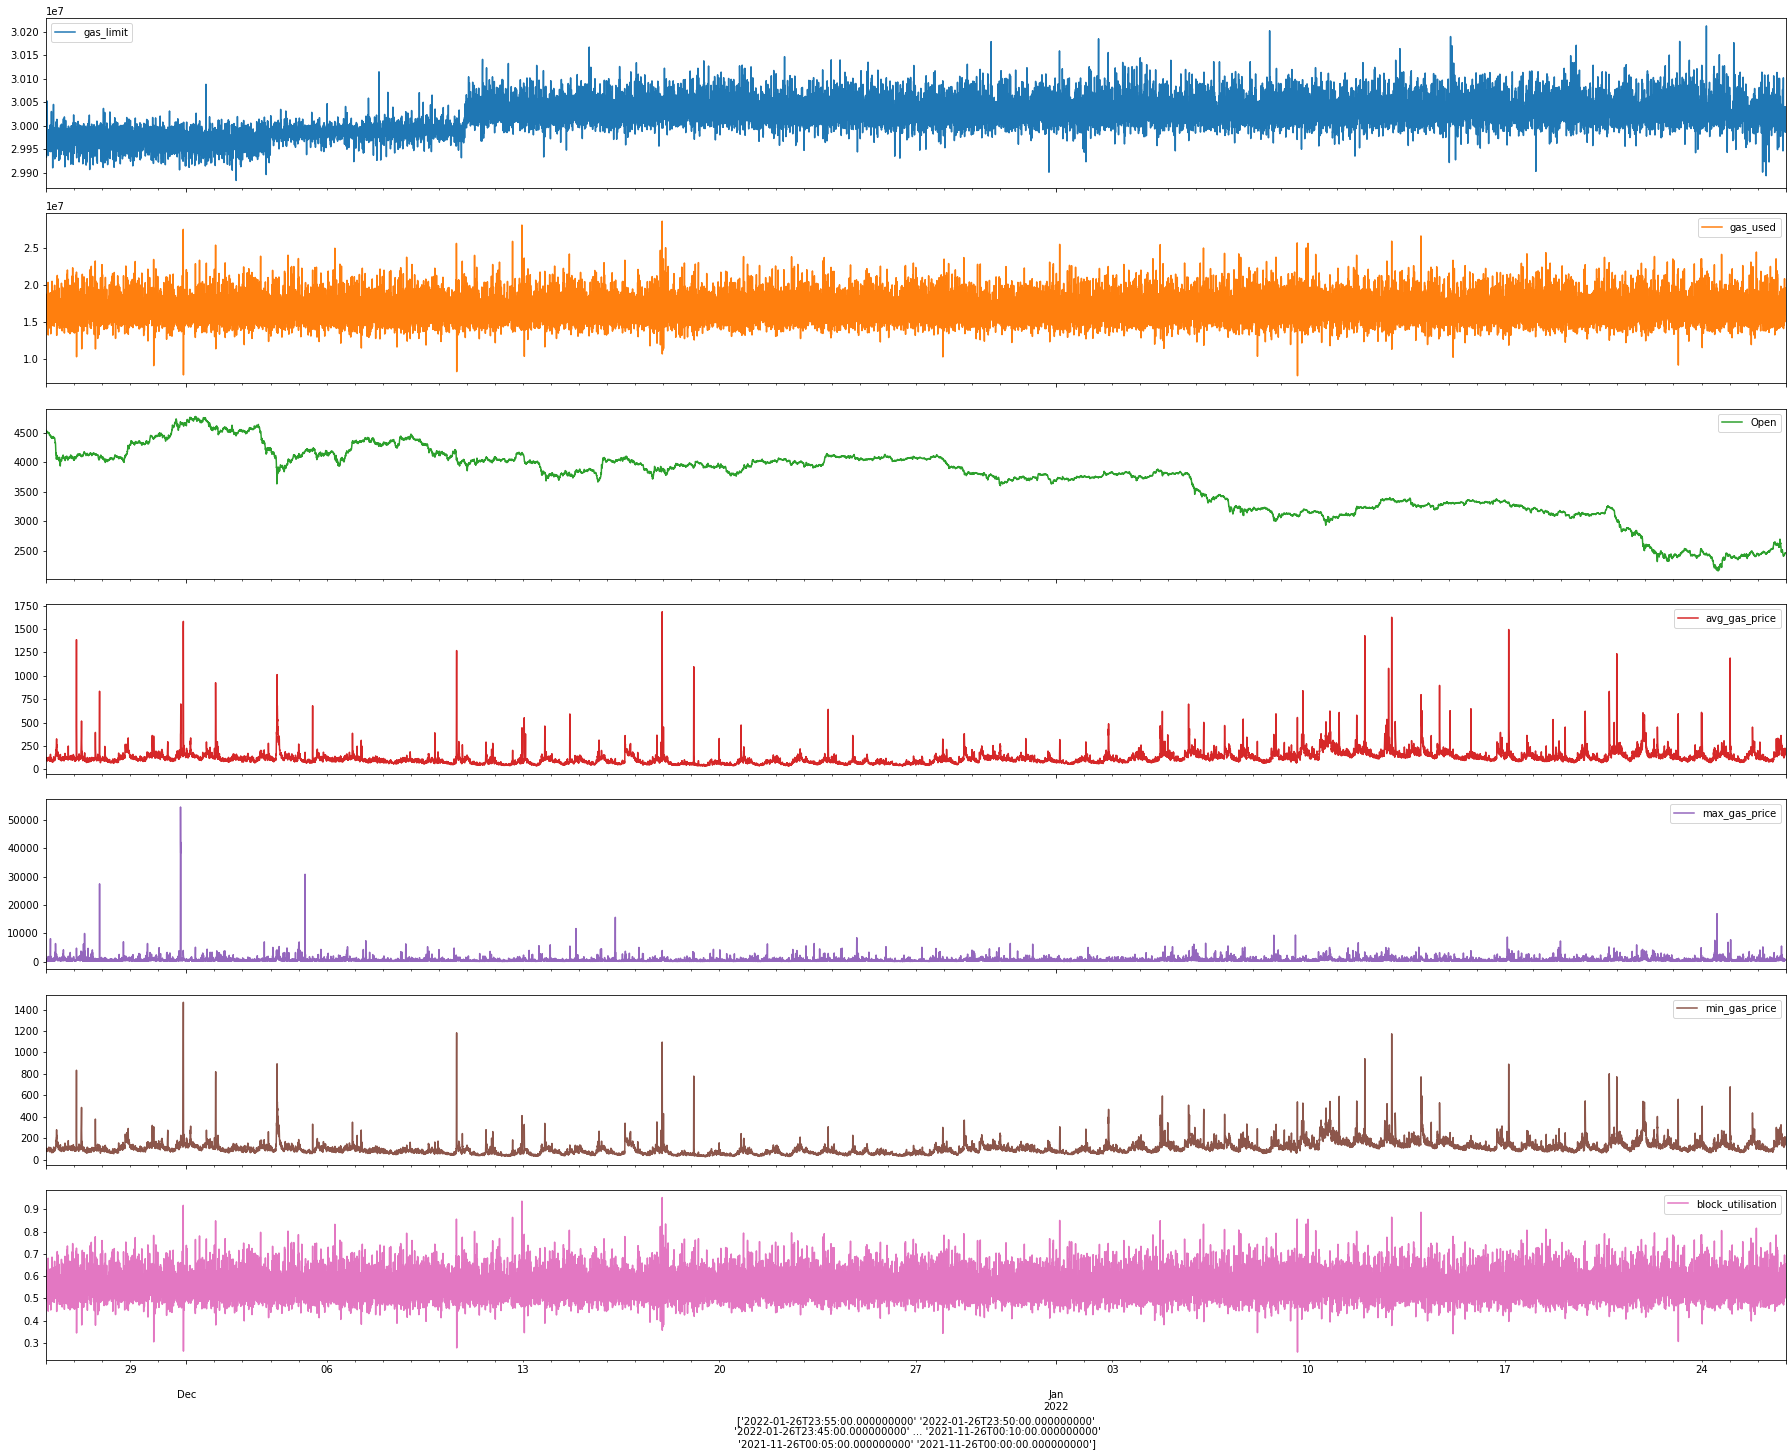

In [16]:

df.plot(subplots=True, figsize=(25, 20))
plt.tight_layout()
plt.xlabel(df.index.values)
plt.show()

Set index to timestamp, data type to float, set sampling window, convert to gwei

In [10]:
df.describe(include='all')

,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
count,1.785600e+04,1.785600e+04,17856.000000,17856.000000,17856.000000,17856.000000,17856.000000
mean,3.001967e+07,1.678962e+07,3699.526181,123.561969,583.246618,110.558976,0.559289
std,3.549473e+04,1.895540e+06,563.045192,72.653201,963.209163,62.009844,0.063142
min,2.988400e+07,7.762109e+06,2165.046000,34.365934,79.554289,28.776412,0.258668
25%,2.999607e+07,1.543665e+07,3267.547000,83.991508,279.575143,74.560029,0.514171
50%,3.001796e+07,1.655857e+07,3829.486000,110.355217,404.934757,98.840857,0.551658
75%,3.004207e+07,1.793657e+07,4069.854500,144.297301,626.595046,131.059822,0.597478
max,3.021185e+07,2.864088e+07,4771.420000,1683.901571,54567.291238,1467.529229,0.952892


(0.0, 24000.0)

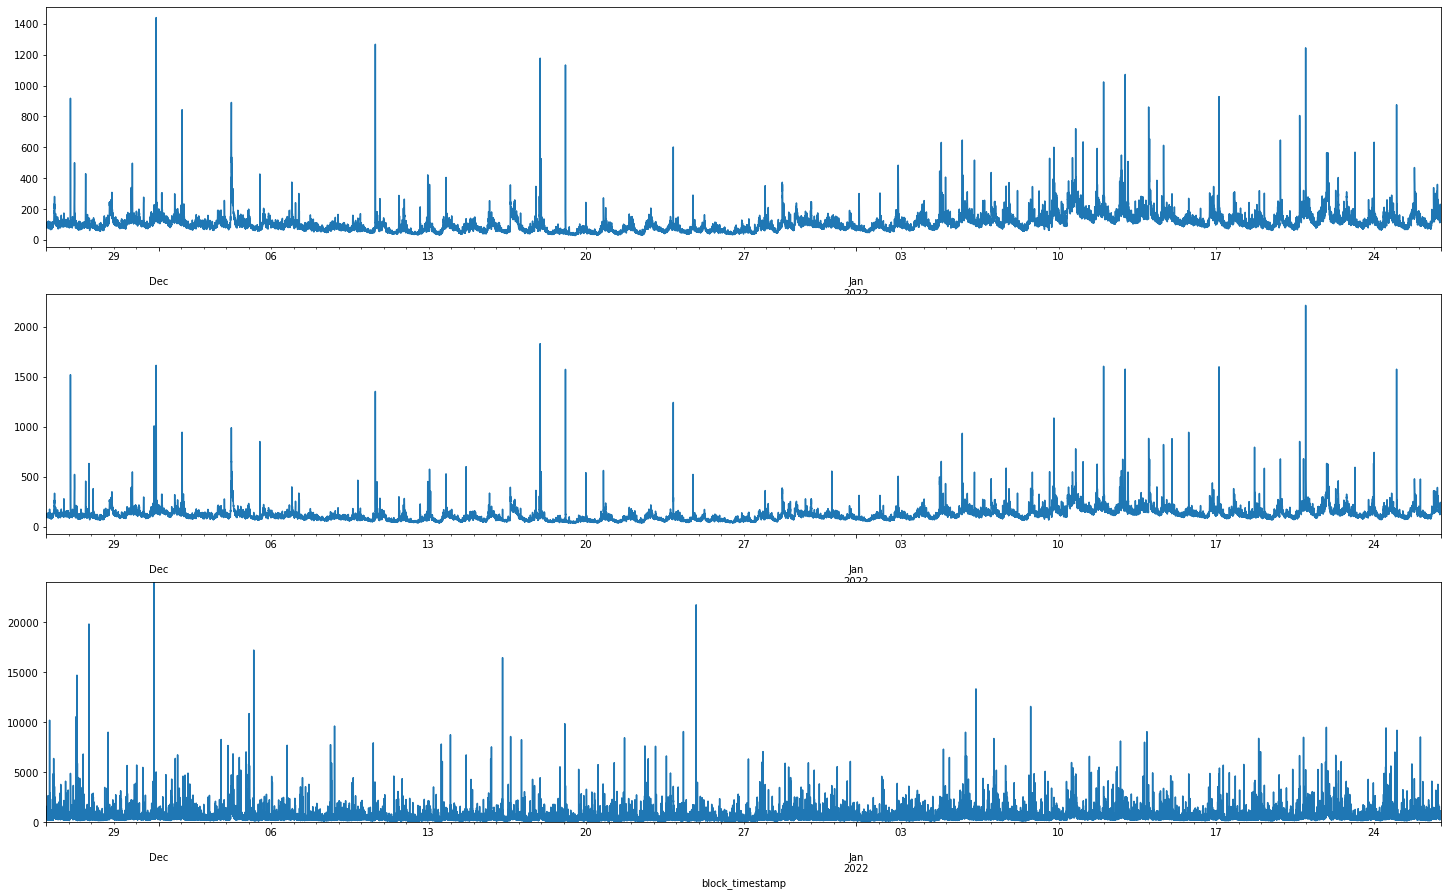

## First week of data

In [17]:
df_week = df.loc['2022-01-19':'2022-01-26']

In [18]:
df_week.head()

,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
datetime,,,,,,,
2022-01-26 00:00:00,2.998584e+07,1.698523e+07,2452.808,127.834117,483.072763,118.363085,0.566475
2022-01-25 23:55:00,2.999901e+07,1.796885e+07,2454.730,127.725953,420.103420,111.072343,0.599029
2022-01-25 23:50:00,3.002580e+07,1.407605e+07,2461.190,141.720231,351.849717,129.004982,0.468728
2022-01-25 23:45:00,3.000116e+07,2.061983e+07,2462.704,155.894053,547.364407,147.166133,0.687352
2022-01-25 23:40:00,3.004764e+07,1.823552e+07,2456.060,140.891488,583.011831,128.107677,0.606875


In [19]:
df_week.describe(include='all')

,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
count,1.729000e+03,1.729000e+03,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,3.003114e+07,1.682246e+07,2612.909124,156.321927,686.173190,141.755275,0.560172
std,3.093655e+04,1.948856e+06,291.626378,79.311837,762.939596,66.493411,0.064918
min,2.994278e+07,9.198768e+06,2165.046000,72.789074,139.740698,65.811559,0.306315
25%,3.000897e+07,1.540976e+07,2418.060000,112.653748,332.164600,102.474312,0.513161
50%,3.002534e+07,1.658201e+07,2462.330000,137.704020,480.345324,126.067033,0.552333
75%,3.004860e+07,1.798682e+07,2839.812000,177.020200,754.851081,161.396493,0.598961
max,3.021185e+07,2.447104e+07,3265.742000,1236.171405,16961.332390,802.038347,0.815327


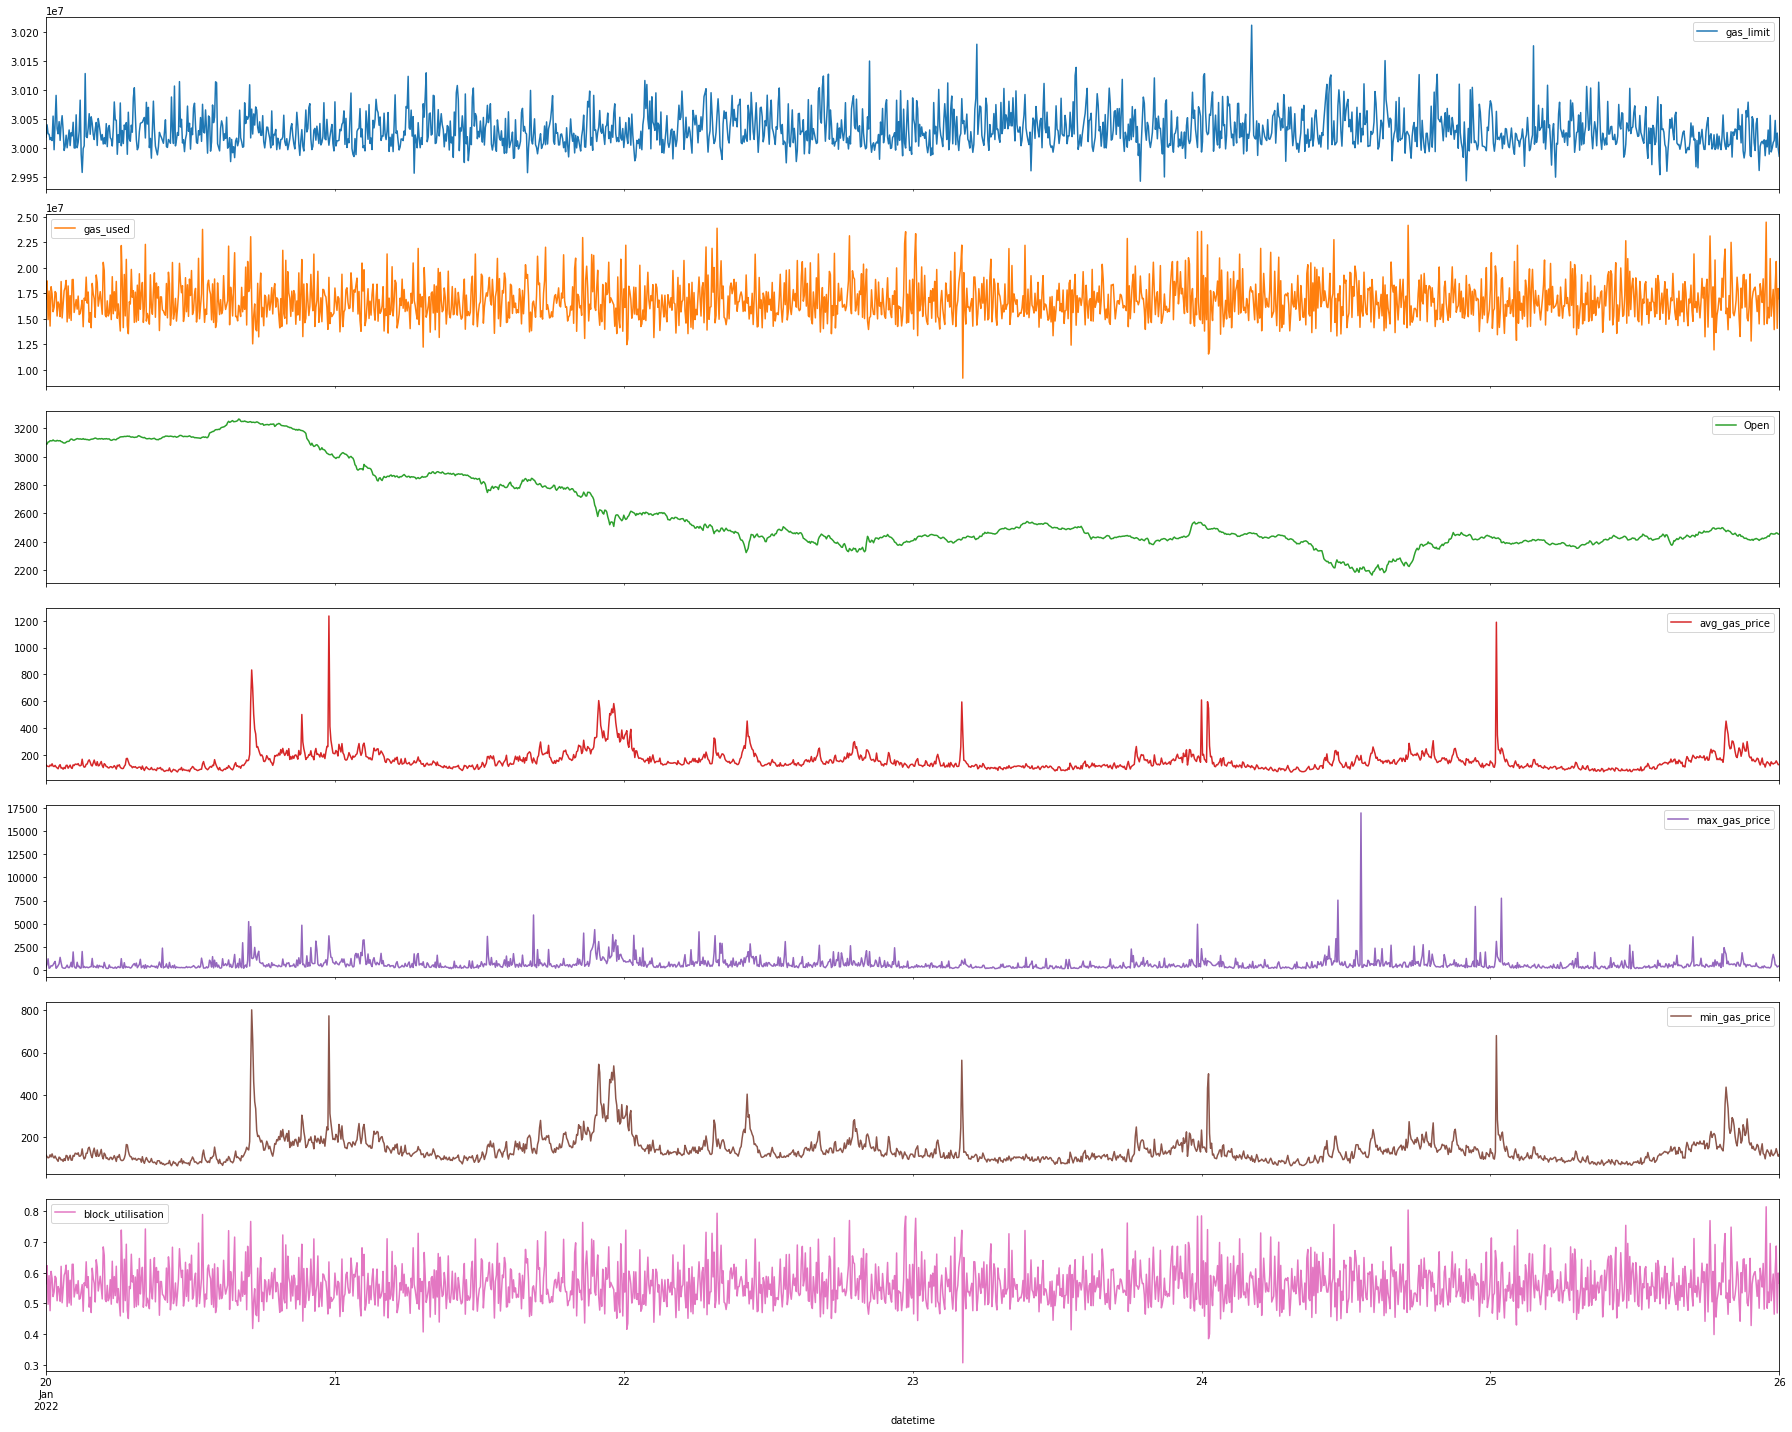

In [20]:

df_week.plot(subplots=True, figsize=(25, 20))
plt.tight_layout()
plt.show()


In [21]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Text(0.5, 1.0, 'min gas Price Autocorrelation, 5 min timestep')

<Figure size 360x360 with 0 Axes>

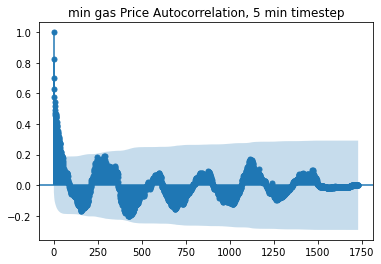

In [22]:
plt.figure(figsize=(5, 5))
plot_acf(df_week['min_gas_price'], lags = 1728)
plt.title('min gas Price Autocorrelation, 5 min timestep')

Text(0.5, 1.0, 'min gas Price Partial Autocorrelation, 5min timestep')

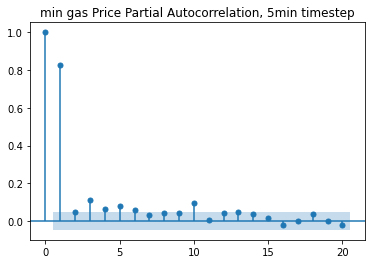

In [64]:
plot_pacf(df_week['min_gas_price'], lags = 20)
plt.title('min gas Price Partial Autocorrelation, 5min timestep')